# Comprehensive Analysis of Breast Cancer Dataset

This notebook provides a comprehensive analysis of the Breast Cancer dataset. The dataset includes information on patients diagnosed with breast cancer, with attributes such as tumor size, type, location, and clinical outcomes. The analysis will include data cleaning, exploratory data analysis (EDA), and the development of predictive models.

## Table of Contents
1. Data Cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Development
5. Model Evaluation
6. Conclusion


## Data Cleaning

In [7]:
import pandas as pd

file_path = 'data/breast_cancer_data.csv'
data = pd.read_csv(file_path)

data.head()

missing_values = data.isnull().sum()

data = data.dropna(axis=1, how='all')

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

missing_values_post_cleaning = data.isnull().sum()

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploratory Data Analysis (EDA)

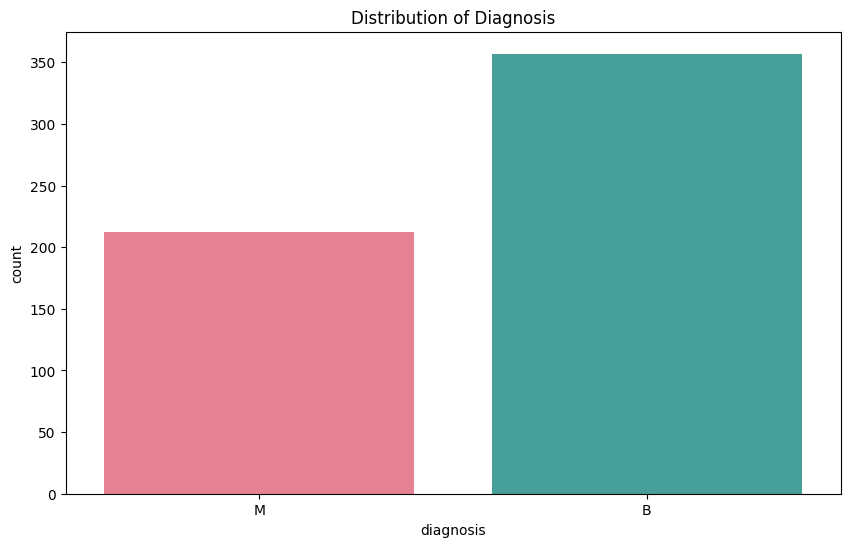

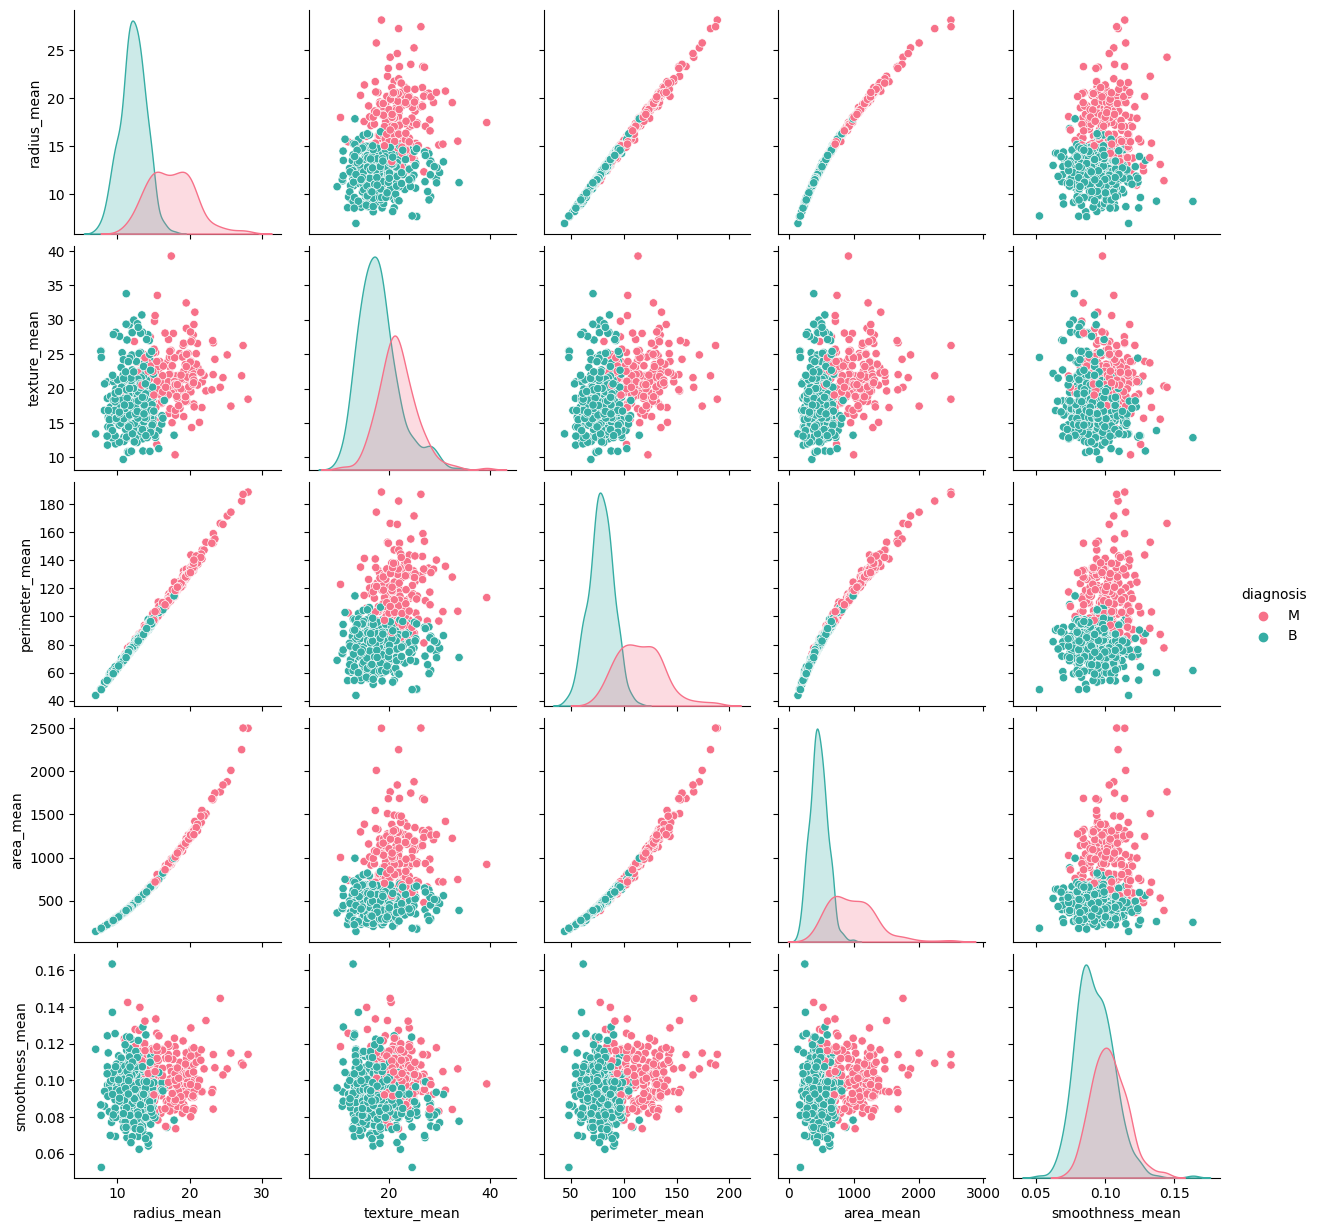

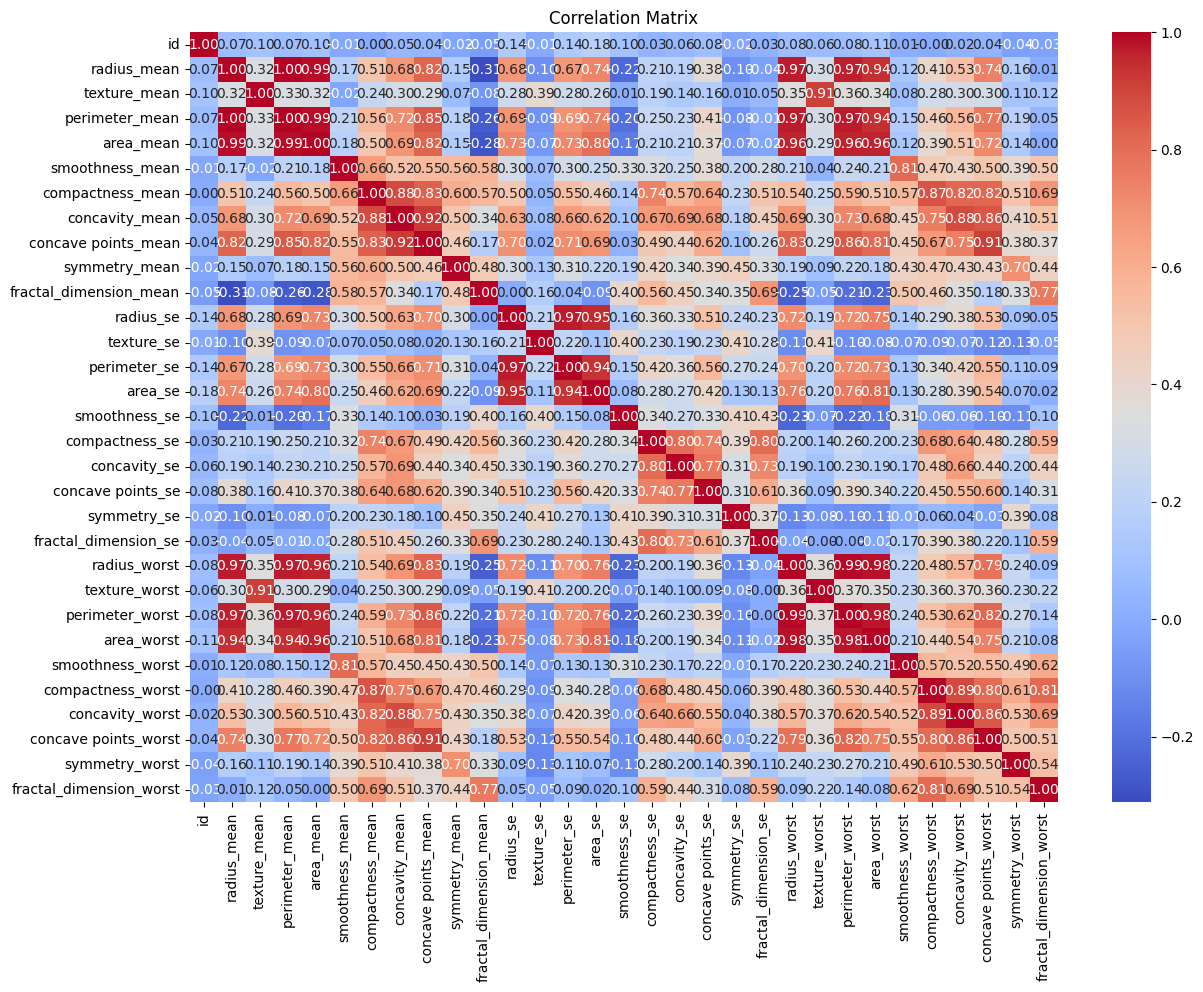

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=data, palette='husl')
plt.title('Distribution of Diagnosis')
plt.show()

selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.pairplot(data[selected_features + ['diagnosis']], hue='diagnosis', palette='husl')
plt.show()

numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(14, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [9]:

data['mean_radius_texture'] = (data['radius_mean'] + data['texture_mean']) / 2
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,mean_radius_texture
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,14.185
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,19.170
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,20.470
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,15.900
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,17.315


## Model Development

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis'].map({'M': 1, 'B': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Model Evaluation

Feature ranking:
1. feature 27 (0.153586)
2. feature 22 (0.128948)
3. feature 23 (0.120851)
4. feature 7 (0.117026)
5. feature 20 (0.068060)
6. feature 3 (0.051068)
7. feature 6 (0.045035)
8. feature 30 (0.043085)
9. feature 13 (0.036804)
10. feature 0 (0.029111)
11. feature 2 (0.028348)
12. feature 26 (0.021502)
13. feature 21 (0.017058)
14. feature 12 (0.013673)
15. feature 1 (0.013276)
16. feature 28 (0.013082)
17. feature 25 (0.013024)
18. feature 10 (0.012980)
19. feature 24 (0.011556)
20. feature 5 (0.011295)
21. feature 16 (0.006809)
22. feature 18 (0.005808)
23. feature 11 (0.005686)
24. feature 17 (0.005315)
25. feature 29 (0.005121)
26. feature 14 (0.004571)
27. feature 19 (0.004562)
28. feature 4 (0.004508)
29. feature 15 (0.003304)
30. feature 9 (0.002507)
31. feature 8 (0.002443)


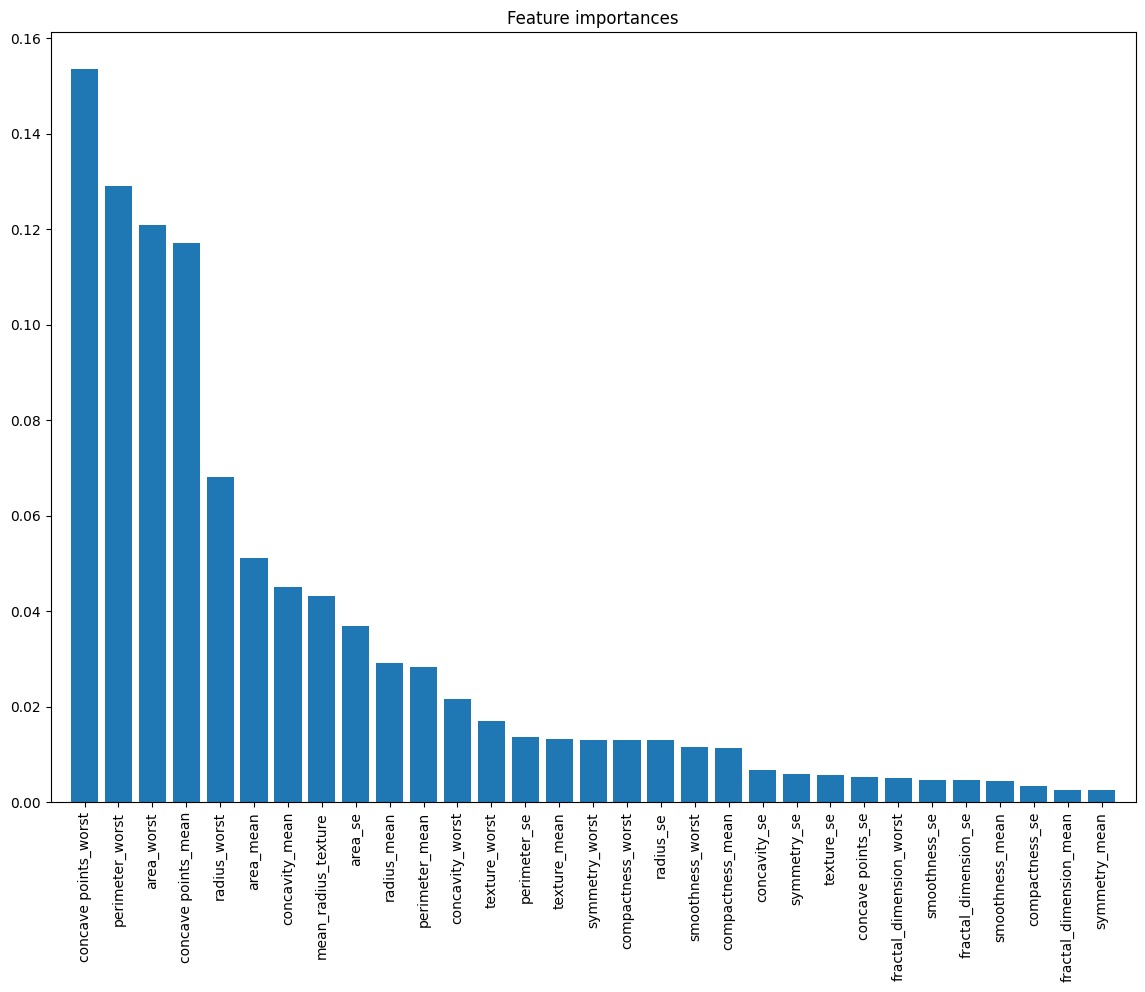

In [12]:
import numpy as np

importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize=(14, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()



## Conclusion

This notebook contains a comprehensive analysis of the Breast Cancer dataset started with data cleaning to handle missing values, followed by exploratory data analysis (EDA) to understand the distribution and relationships of the features. We then performed feature engineering to create new features and developed a predictive model using a Random Forest Classifier. Finally, 
evaluated the model's performance and analyzed feature importance. This comprehensive analysis provides valuable insights into the factors affecting breast cancer diagnosis and can be used to improve predictive models and treatment protocols.
